
# PCA Component Selection

**Goal:** Apply PCA to a standardized dataset, generate:
1) Scree plot (explained variance per component)  
2) Cumulative explained variance plot  
Then compute the **minimum number of components** to retain **≥ 90%** variance.

**Dataset:** `sklearn.datasets.load_breast_cancer` (30 numeric features).  
We standardize features with `StandardScaler`, fit PCA over all components, plot the results, and auto-compute *k* for the 90% threshold.


In [1]:

# 0) Imports & versions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

%matplotlib inline

import sklearn, sys
print("Python:", sys.version.split()[0])
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)


Python: 3.12.12
numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1


In [2]:

# 1) Load fixed dataset & standardize
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("Shape (n_samples, n_features):", X_std.shape)
print("First 3 standardized rows:")
print(np.round(X_std[:3, :5], 3))


Shape (n_samples, n_features): (569, 30)
First 3 standardized rows:
[[ 1.097 -2.073  1.27   0.984  1.568]
 [ 1.83  -0.354  1.686  1.909 -0.827]
 [ 1.58   0.456  1.567  1.559  0.942]]


In [3]:

# 2) PCA fit (all components)
pca = PCA(n_components=X_std.shape[1], svd_solver="full", random_state=42)
X_pca = pca.fit_transform(X_std)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

threshold = 0.90
k_90 = int(np.argmax(cum_explained >= threshold) + 1)

print("Explained variance ratio (first 10):", np.round(explained[:10], 4))
print("Cumulative (first 10):", np.round(cum_explained[:10], 4))
print(f"Minimum components for >= {int(threshold*100)}% variance: k = {k_90}")


Explained variance ratio (first 10): [0.4427 0.1897 0.0939 0.066  0.055  0.0402 0.0225 0.0159 0.0139 0.0117]
Cumulative (first 10): [0.4427 0.6324 0.7264 0.7924 0.8473 0.8876 0.9101 0.926  0.9399 0.9516]
Minimum components for >= 90% variance: k = 7


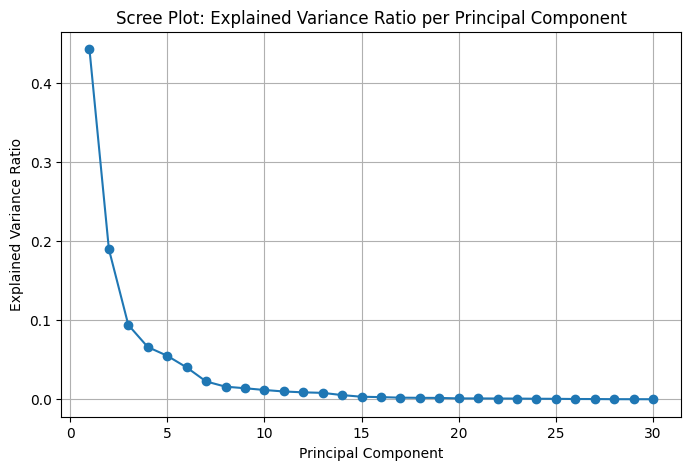

In [4]:

# 3) Scree plot
plt.figure(figsize=(8, 5))
x = np.arange(1, len(explained) + 1)
plt.plot(x, explained, marker="o")
plt.title("Scree Plot: Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


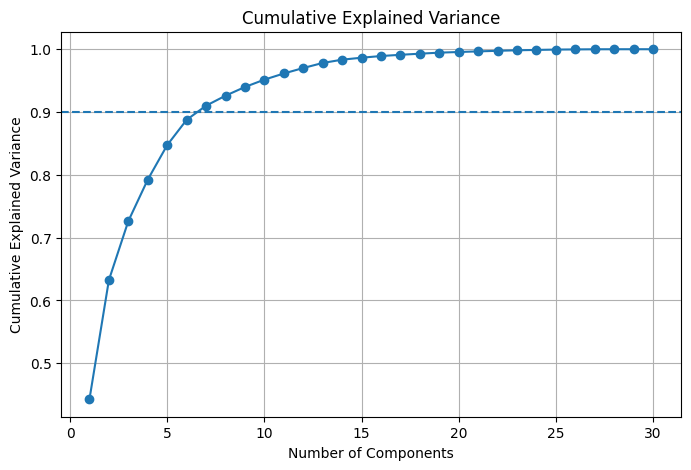

With k = 7 components, cumulative explained variance = 0.9101


In [5]:

# 4) Cumulative explained variance
plt.figure(figsize=(8, 5))
x = np.arange(1, len(cum_explained) + 1)
plt.plot(x, cum_explained, marker="o")
plt.axhline(0.90, linestyle="--")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

print(f"With k = {k_90} components, cumulative explained variance = {cum_explained[k_90-1]:.4f}")



## Result & Justification

- The **minimum** number of components to retain **≥ 90%** variance is reported as **k** above.  
- **Scree plot** helps visualize where variance gains flatten (diminishing returns).  
- **Cumulative plot** shows exactly where we cross the **90%** threshold.

**Assumptions & Notes**
- Features are standardized (mean 0, variance 1) because PCA is scale-sensitive.
- PCA is unsupervised; labels (if present) are not used.
- The 90% rule is conventional; choose higher thresholds if your domain requires more fidelity.
